# Data Preparation: White Noise & Random Walks

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
plt.style.use("seaborn-whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## White Noise

If the series is white noise, this is just a series of random numbers and cannot be predicted. The following conditions have to be investigated to detect white noise.

- Check if series have a zero mean
- Check if the variance is constant over time
- Check if the correlation is 0 with lagged values

Let’s explore the statistical tools which can help us in detecting white noise.

- Summary statistics: Check and compare the mean and variance of the entire time series against different time intervals.
- Line plot: Line plot will give us a basic idea about inconsistent mean and variance over time.
- Autocorrelation plot: Check the strength of the correlation between lagged observations.

We will discuss the above tools using a synthetically created white noise time series data. We will create this variable using a gaussian distribution with mean 0 and standard deviation 1.

In [2]:
# create white noise
white_noise = pd.Series(np.random.randn(1000))
white_noise.head()

0   -0.498910
1    0.021095
2   -0.476656
3    0.323901
4    0.089495
dtype: float64

In [3]:
# summary statistics
white_noise.describe()

count    1000.000000
mean        0.011792
std         0.945927
min        -2.587191
25%        -0.636370
50%         0.003898
75%         0.609548
max         3.458022
dtype: float64

Now, look at the summary statistics, mean is nearly 0 and the standard deviation is 1, this is expected in this example. In real life after looking at this summary, series can be distributed in multiple sub-series and respective statistics can be compared for any inconsistency in mean and variance over time.

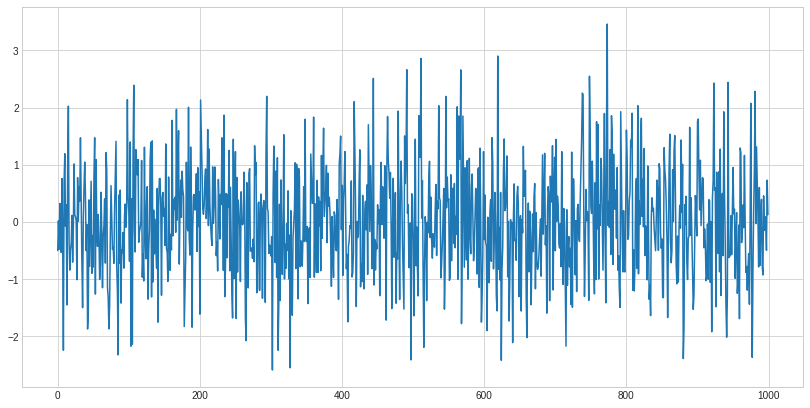

In [4]:
# line plot
plt.figure(figsize=(14,7))
white_noise.plot()
plt.show()

Histogram with a bell-shaped curve confirms the Gaussian distribution with mean 0 and variance 1. Again, we can validate this distribution for different time intervals.

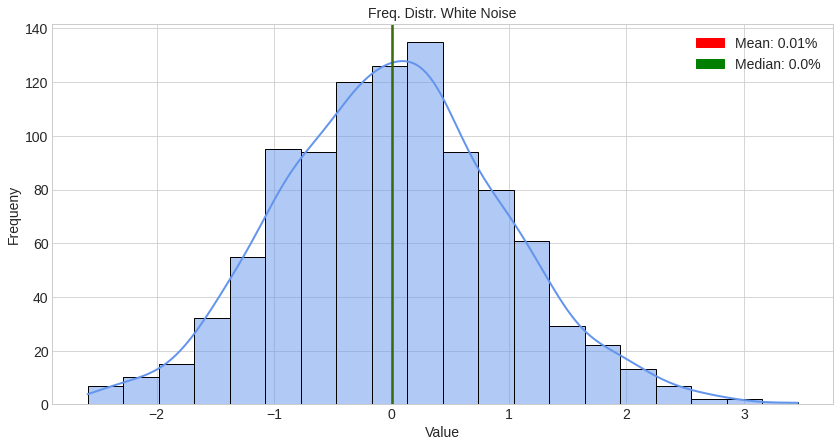

In [5]:
# histogram plot
plt.figure(figsize=(14,7))

sns.histplot(white_noise, 
             kde=True, 
             bins=20,
             color="cornflowerblue",
             line_kws={"linewidth": 2})

mean = white_noise.mean()
median = white_noise.median()
plt.axvline(x=mean, c="r")
plt.axvline(x=median, c="g")
mean_patch = mpatches.Patch(color="r", label="Mean: {}%".format(np.around(mean,2)))
median_patch = mpatches.Patch(color="g", label="Median: {}%".format(np.around(median,2)))

plt.legend(handles=[mean_patch, median_patch], fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Frequeny", fontsize=14)
plt.title("Freq. Distr. White Noise", fontsize=14)

plt.show()

Finally, we can investigate the strength of the correlation between lagged observations using the autocorrelation plot.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


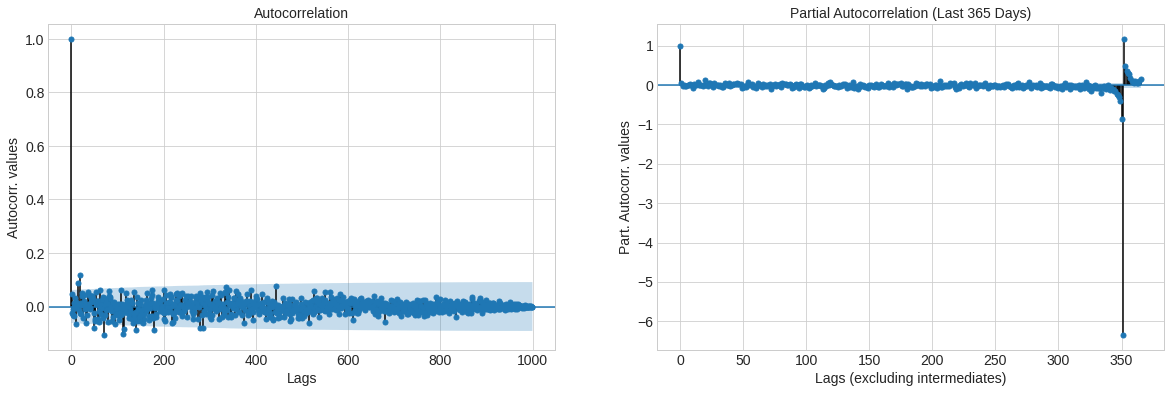

In [6]:
# plot autocorrelations & partial autocorrelation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plot_acf(white_noise.tolist(), lags=white_noise.shape[0]-1, ax=axes[0])
axes[0].set_title("Autocorrelation", fontsize=14)
axes[0].set_xlabel('Lags', fontsize=14)
axes[0].set_ylabel('Autocorr. values', fontsize=14)
plt.setp(axes[0].get_xticklabels(), fontsize=14)
plt.setp(axes[0].get_yticklabels(), fontsize=14)

plot_pacf(white_noise.tolist(), lags=365, ax=axes[1])
axes[1].set_title("Partial Autocorrelation (Last 365 Days)", fontsize=14)
axes[1].set_xlabel('Lags (excluding intermediates)', fontsize=14)
axes[1].set_ylabel('Part. Autocorr. values', fontsize=14)
plt.setp(axes[1].get_xticklabels(), fontsize=14)
plt.setp(axes[1].get_yticklabels(), fontsize=14)

plt.show()

We can see there is no correlation between lagged observations. Therefore, we can conclude this series is white noise and cannot be predicted well.

## Random Walk

A random walk is a series in which changes from one time period (t) to the next (t+1) are random. The process used in generating a random walk forces dependency from one time step to the next, we can understand this dependency with the following equation, where X(t) is the next value in the series, X(t-1) is the value at the previous time step and e(t) is the white noise at next time.

$ X(t) = X(t-1) + e(t) $

The simplest random walk to understand is a 1-dimensional walk. Suppose that the black dot below is sitting on a number line. The black dot starts in the center. 

<img src="https://raw.githubusercontent.com/lucaskienast/Time-Series-Analysis/main/1)%20Data%20Preparation/Random%20Walk%20Number%20Line.png">

Then, it takes a step, either forward or backward, with equal probability. It keeps taking steps either forward or backward each time. Let’s call the 1st step a₁, the second step a₂, the third step a₃, and so on. Each “a” is either equal to +1 (if the step is forward) or -1 (if the step is backward).

<img src="https://raw.githubusercontent.com/lucaskienast/Time-Series-Analysis/main/1)%20Data%20Preparation/Random%20Walk%20Steps.png">

Now, we will simulate a random walk using the same approach and plot these observations on a line.


In [7]:
# create random walk
steps_n = 1000
step_options = [-1, 1]
origin = np.zeros((1,1))
steps = np.random.choice(a=step_options, size=(steps_n, 1))
random_walk = pd.Series(np.concatenate([origin, steps]).cumsum())
random_walk

0       0.0
1      -1.0
2       0.0
3       1.0
4       2.0
       ... 
996     8.0
997     7.0
998     8.0
999     9.0
1000    8.0
Length: 1001, dtype: float64

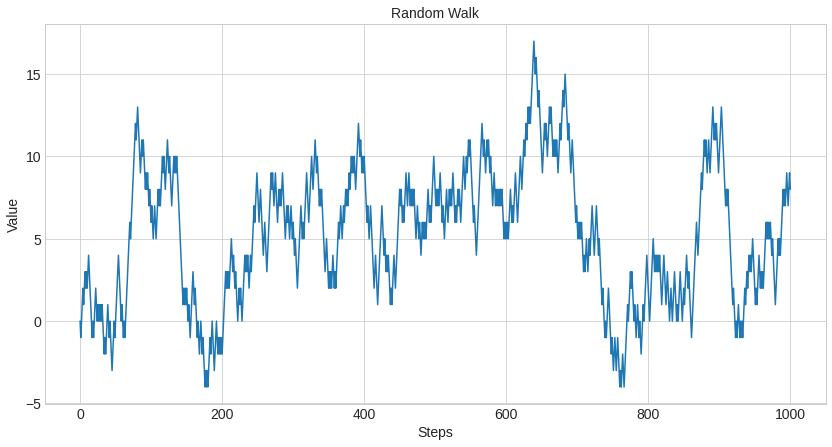

In [8]:
# plot random walk
plt.figure(figsize=(14,7))
random_walk.plot()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Steps", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.title("Random Walk", fontsize=14)
plt.show()

We can see this shape looks like a movement of real stock index.
Now, let’s explore the tools which can help us in identifying a random walk within any time series.

## Autocorrelation Plot

We know how random walk is created, so by its design, we expect a very high correlation with the previous observation and gradually this correlation will be reduced.

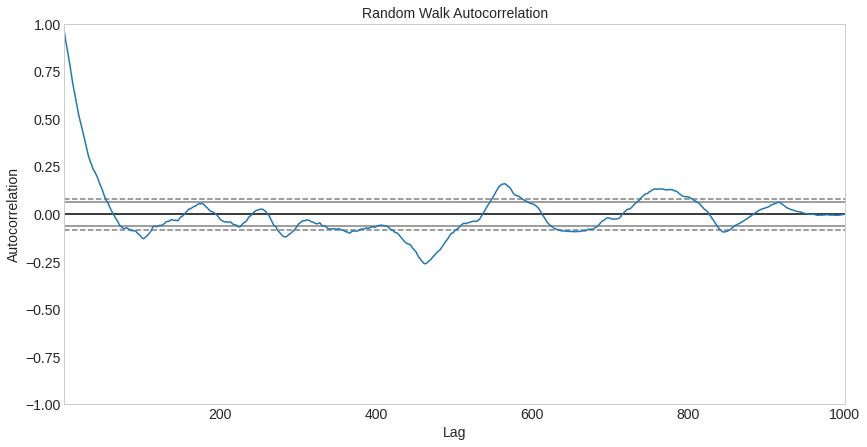

In [9]:
# plot autocorrelation
plt.figure(figsize=(14,7))
autocorrelation_plot(random_walk)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.title("Random Walk Autocorrelation", fontsize=14)
plt.show()

## Stationarity & ADF / KPSS Tests (to confirm non-stationarity)

The way random walk is created, the series expected to be non-stationary, i.e., inconsistency in mean and variance over time.

In [10]:
# ADF (H0: non-stationary)
def adf_stationarity_test(signal):
  result_adf = adfuller(signal, autolag="AIC")
  statistic = result_adf[0]
  p_value = result_adf[1]
  used_lag = result_adf[2]
  nobs = result_adf[3]
  critical_values = result_adf[4]
  icbest = result_adf[5]
  print("________________________________")
  print(" > ADF: Is the data stationary ?")
  print(f'ADF Statistic: {statistic}')
  print(f'p-value: {p_value}')
  print(f'num lags: {used_lag}')
  print('Critial Values:')

  for key, value in critical_values.items():
      print(f'   {key}, {value}')  

  print(f'\nResult: The series is likely {"not " if p_value > 0.05 else ""}stationary')
  print("________________________________")

In [11]:
# KPSS test around constant (H0: stationary around constant)
def kpss_constant_stationarity_test(signal):
  result_kpss_c = kpss(signal, regression="c")

  statistic = result_kpss_c[0]
  p_value = result_kpss_c[1]
  n_lags = result_kpss_c[2]
  critical_values = result_kpss_c[3]

  print("________________________________")
  print(" > KPSS: Is the data stationary around a constant ?")
  print(f'KPSS Statistic: {statistic}')
  print(f'p-value: {p_value}')
  print(f'num lags: {n_lags}')
  print('Critial Values:')

  for key, value in critical_values.items():
    print(f'   {key} : {value}')
    
  print(f'\nResult: The series is likely {"not " if p_value < 0.05 else ""}stationary around a constant')
  print("________________________________")

In [12]:
# KPSS test around trend (H0: stationary around trend)
def kpss_trend_stationarity_test(signal):
  result_kpss_ct = kpss(signal, regression="ct")

  statistic = result_kpss_ct[0]
  p_value = result_kpss_ct[1]
  n_lags = result_kpss_ct[2]
  critical_values = result_kpss_ct[3]

  print("________________________________")
  print(" > KPSS: Is the data stationary around a trend ?")
  print(f'KPSS Statistic: {statistic}')
  print(f'p-value: {p_value}')
  print(f'num lags: {n_lags}')
  print('Critial Values:')

  for key, value in critical_values.items():
    print(f'   {key} : {value}')
    
  print(f'\nResult: The series is likely {"not " if p_value < 0.05 else ""}stationary around a trend')
  print("________________________________")

In [13]:
adf_stationarity_test(random_walk)
kpss_constant_stationarity_test(random_walk)
kpss_trend_stationarity_test(random_walk)

________________________________
 > ADF: Is the data stationary ?
ADF Statistic: -3.590212744418796
p-value: 0.005950919488602196
num lags: 4
Critial Values:
   1%, -3.4369325637409154
   5%, -2.8644462162311934
   10%, -2.568317409920808

Result: The series is likely stationary
________________________________
________________________________
 > KPSS: Is the data stationary around a constant ?
KPSS Statistic: 0.29837890585855337
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

Result: The series is likely stationary around a constant
________________________________
________________________________
 > KPSS: Is the data stationary around a trend ?
KPSS Statistic: 0.26677443984842375
p-value: 0.01
num lags: 22
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216

Result: The series is likely not stationary around a trend
________________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


We can make the time series stationary by taking first differencing and then again will analyze its characteristics. This difference line plot also suggests that there is no information to work with other than a series of random numbers. Finally, we can see the pattern through an autocorrelation plot and confirm no relationship between the lagged observations.

In [14]:
# difference random walk (by design I(1) so now becomes I(0))
differenced = random_walk.diff()[1:]
differenced.head()

1   -1.0
2    1.0
3    1.0
4    1.0
5   -1.0
dtype: float64

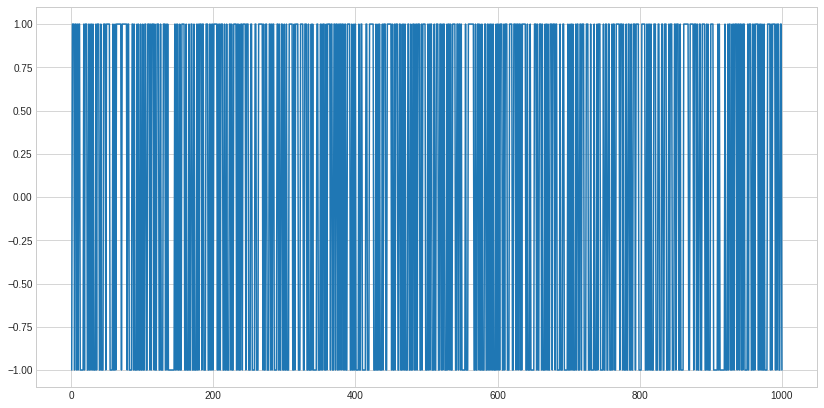

In [15]:
# line plot of differenced random walk
plt.figure(figsize=(14,7))
differenced.plot()
plt.show()

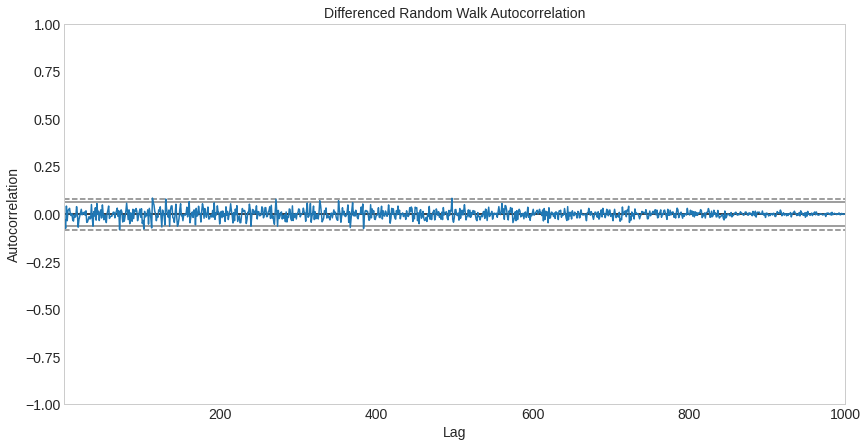

In [16]:
# plot autocorrelation of differenced random walk
plt.figure(figsize=(14,7))
autocorrelation_plot(differenced)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.title("Differenced Random Walk Autocorrelation", fontsize=14)
plt.show()

We have seen a random walk is also unpredictable like white noise; the best prediction we could make would be to use the value at the previous time step to predict the next time step as we know the next time step is a function of the prior time step. This forecasting approach is also known as the naive forecast.